In [6]:
!pip install networkx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
file_path = 'C:/Users/thaplood2/Desktop/100206_jackknife_sigConn_aparc35_1.xlsx'
df = pd.read_excel(file_path, sheet_name='LH_fc', header=None)  # Use sheet_name=1 for the second sheet (index starts from 0)

# Step 2: Create a graph from the data
G = nx.Graph()

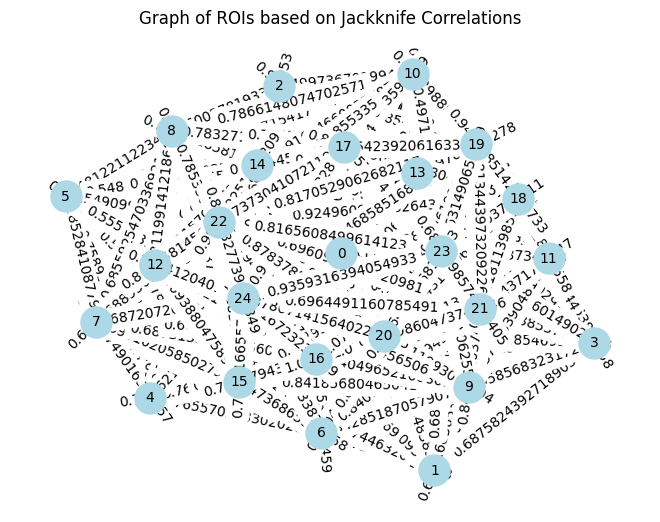

In [7]:
# Step 3: Add edges with weights from the jackknife correlations
num_rois = min(df.shape[0], df.shape[1])  # Get the number of rows and columns, take the smaller one to avoid out-of-bounds

for i in range(num_rois):
    for j in range(i+1, num_rois):
        weight = df.iloc[i, j]  # Correlation value
        if weight != 0:  # Ignore zero correlations
            G.add_edge(i, j, weight=weight)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Layout for visualizing the graph
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

plt.title('Graph of ROIs based on Jackknife Correlations')
plt.show()

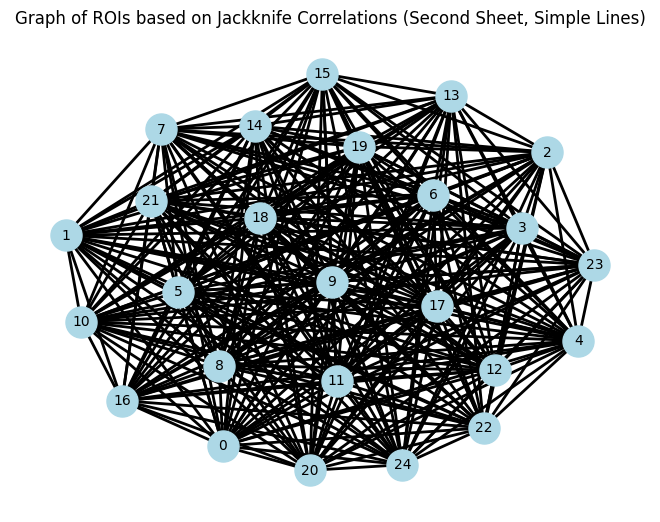

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the second sheet of the Excel file
file_path = 'C:/Users/thaplood2/Desktop/100206_jackknife_sigConn_aparc35_1.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=None)  # Use sheet_name=1 for the second sheet (index starts from 0)

# Step 2: Create a graph from the data
G = nx.Graph()

# Step 3: Ensure the number of ROIs based on the actual data
num_rois = min(df.shape[0], df.shape[1])  # Get the number of rows and columns, take the smaller one to avoid out-of-bounds

# Step 4: Add edges between ROIs where there is a non-zero correlation
for i in range(num_rois):
    for j in range(i+1, num_rois):
        weight = df.iloc[i, j]  # Correlation value
        if pd.notna(weight) and weight != 0:  # Only add an edge if there is a valid non-zero correlation
            G.add_edge(i, j)  # Add edge without weight

# Step 5: Visualize the graph (without edge labels or weights)
pos = nx.spring_layout(G)  # Layout for visualizing the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='black', width=2)

plt.title('Graph of ROIs based on Jackknife Correlations (Second Sheet, Simple Lines)')
plt.show()


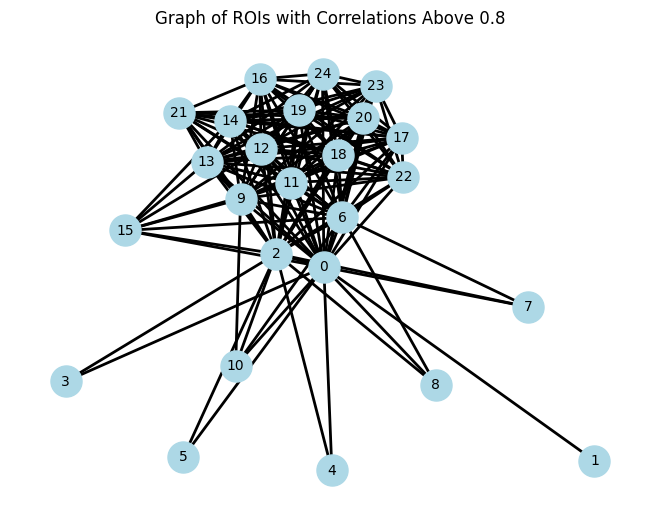

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the second sheet of the Excel file
file_path = 'C:/Users/thaplood2/Desktop/100206_jackknife_sigConn_aparc35_1.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=None)  # Use sheet_name=1 for the second sheet (index starts from 0)

# Step 2: Define a threshold for including edges (e.g., only include correlations above 0.5)
threshold = 0.8  # You can change this threshold as needed

# Step 3: Create a graph from the data
G = nx.Graph()

# Step 4: Ensure the number of ROIs based on the actual data
num_rois = min(df.shape[0], df.shape[1])  # Get the number of rows and columns, take the smaller one to avoid out-of-bounds

# Step 5: Add edges only where correlations exceed the threshold
for i in range(num_rois):
    for j in range(i+1, num_rois):
        weight = df.iloc[i, j]  # Correlation value
        if pd.notna(weight) and weight > threshold:  # Only add an edge if the weight exceeds the threshold
            G.add_edge(i, j)  # Add edge without weight

# Step 6: Visualize the graph (only with lines where correlations exceed the threshold)
pos = nx.spring_layout(G)  # Layout for visualizing the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='black', width=2)

plt.title(f'Graph of ROIs with Correlations Above {threshold}')
plt.show()


In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the second sheet of the Excel file (correlation matrix)
file_path = 'C:/Users/thaplood2/Desktop/100206_jackknife_sigConn_aparc35_1.xlsx'
df_correlations = pd.read_excel(file_path, sheet_name=1, header=None)  # Read the second sheet for correlation matrix

# Step 2: Read the sheet with region names (assuming it's the third sheet)
df_region_names = pd.read_excel(file_path, sheet_name=0, header=None)  # Read the sheet with region names

# Step 3: Extract region names into a list
region_names = df_region_names[1].tolist()  # Assuming the region names are in the first column
print(region_names)

['ROI1', 'lh_bankssts', 'lh_caudalmiddlefrontal', 'lh_caudalmiddlefrontal', 'lh_caudalmiddlefrontal', 'lh_cuneus', 'lh_cuneus', 'lh_inferiorparietal', 'lh_inferiorparietal', 'lh_inferiorparietal', 'lh_lingual', 'lh_postcentral', 'lh_postcentral', 'lh_postcentral', 'lh_postcentral', 'lh_precentral', 'lh_precentral', 'lh_precentral', 'lh_precuneus', 'lh_precuneus', 'lh_rostralmiddlefrontal', 'lh_rostralmiddlefrontal', 'lh_superiorfrontal', 'lh_superiorparietal', 'lh_superiortemporal']


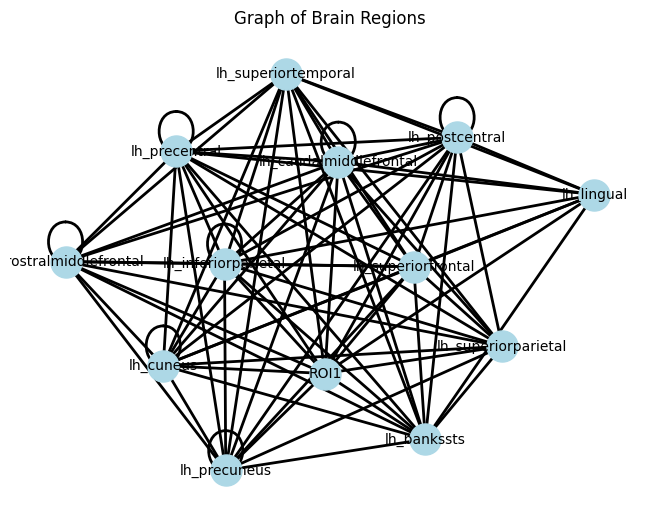

In [23]:


# Step 5: Create a graph from the data
G = nx.Graph()

# Step 6: Add edges only where correlations exceed the threshold
num_rois = len(region_names)  # Number of ROIs is the same as the number of region names
for i in range(num_rois):
    for j in range(i+1, num_rois):
        weight = df_correlations.iloc[i, j]  # Correlation value
        if pd.notna(weight) and weight > threshold:  # Only add edges if the correlation exceeds the threshold
            G.add_edge(region_names[i], region_names[j])  # Add edge with region names

# Step 7: Visualize the graph using region names
pos = nx.spring_layout(G)  # Layout for visualizing the graph (can be customized)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='black', width=2)

plt.title(f'Graph of Brain Regions')
plt.show()